In [6]:
"""
    ans = mytrapezoids(fun, a, b, n)

Numerically evaluate the integral int_a^b fun(x) dx using the
trapezoidal rule: I = h/2*(f_1 + 2f_2 + ... + 2f_{n-1} + f_n),
where h = (b - a)/(n - 1), x_i = a + (i - 1)*h, f_i = fun(x_i).
"""
function mytrapezoids(fun, a, b, n)
    h = (b - a)/(n - 1)
    s1 = fun(a) + fun(b)
    s2 = 0.0
    for i = 2:(n-1)
        s2 += fun(a + (i-1)*h)
    end
    return (s1 + 2*s2)*h/2
end

mytrapezoids

In [7]:
?mytrapezoids

search: mytrapezoids



```
ans = mytrapezoids(fun, a, b, n)
```

Numerically evaluate the integral int*a^b fun(x) dx using the trapezoidal rule: I = h/2*(f*1 + 2f*2 + ... + 2f*{n-1} + f*n), where h = (b - a)/(n - 1), x*i = a + (i - 1)*h, f*i = fun(x*i).


In [8]:
fun1(x) = 1/x
a1 = 1.0
b1 = 2.0
exact1 = log(2)
np1 = 20 

20

In [9]:
res1 = mytrapezoids(fun1, a1, b1, np1)

0.6933202508885106

In [10]:
round(abs(res1 - exact1), sigdigits=1)

0.0002

In [11]:
fun2(x) = exp(x)
a2 = 0.0
b2 = 1.0
exact2 = exp(1)-1.0
np2 = 100

100

In [12]:
res2 = mytrapezoids(fun2, a2, b2, np2)

1.718296438183449

In [13]:
round(abs(res2 - exact2), sigdigits=1)

1.0e-5

In [14]:
fun3(x)= sin(x)
a3 = 0.0
b3 = pi
exact3 = 2.0

2.0

In [15]:
ndp = 10
hh = zeros(ndp) #creat an array of ndp elements
abserrs = zeros(ndp);

In [16]:
for i = 1:ndp
    np = 2^i + 1
    hh[i] = (b3 - a3)/(np - 1)
    abserrs[i] = abs(mytrapezoids(fun3, a3, b3, np) - exact3)
end

In [17]:
using PyPlot

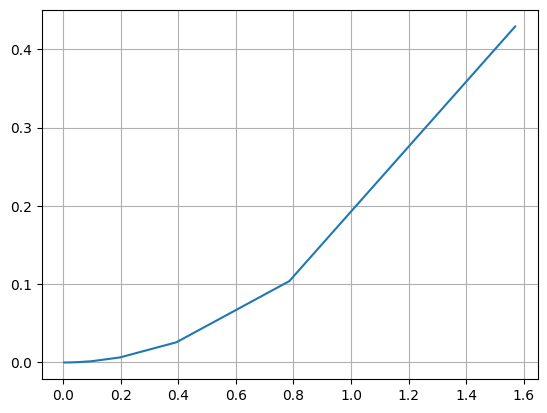

In [18]:
plot(hh, abserrs)
grid(true)

In [19]:
using PyPlot

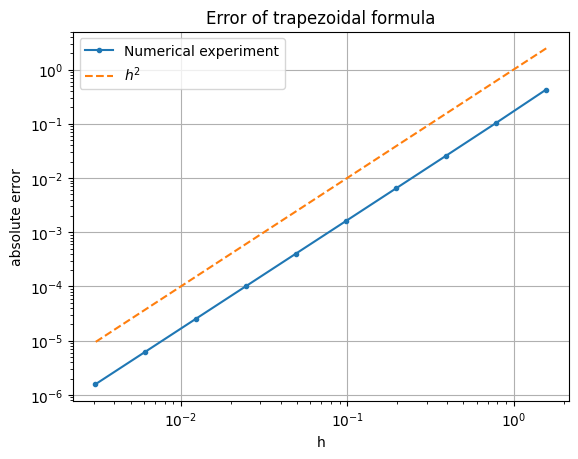

In [20]:
loglog(hh, abserrs, marker=".", label="Numerical experiment")
loglog(hh, hh.^2, linestyle="dashed", label=L"h^2")
grid(true)
xlabel("h")
ylabel("absolute error")
title("Error of trapezoidal formula")
legend(); 

In [21]:
function mytrapezoids2(fv, h)
    return h/2*(fv[1] + fv[end] + 2*sum(fv[2:(end-1)]))
    end

mytrapezoids2 (generic function with 1 method)

In [22]:
x1 = range(a1, b1, np1)
fv1 = fun1.(x1)
h1 = x1[2] - x1[1]
round(abs(mytrapezoids2(fv1, h1) - exact1), sigdigits=1)

0.0002

In [23]:
x2 = range(a2, b2, np2)
fv2 = fun2.(x2)
h2 = x2[2] - x2[1]
round(abs(mytrapezoids2(fv2, h2) - exact2), sigdigits=1)

1.0e-5

In [28]:
function simpson2(fun, a, b, n)
    x = range(a, b, n)
    fv = fun.(x)
    h = x[2]-x[1]
    th = mytrapezoids2(fv, h)
    t2h = mytrapezoids2(fv[1:2:end], 2*h)
        simp = 1/3*(4*th - t2h)
        return simp
    end

simpson2 (generic function with 1 method)

In [29]:
nps1 = 19
round(abs(simpson2(fun1, a1, b1, nps1) - exact1), sigdigits=1)

3.0e-7

In [30]:
nps2 = 99
round(abs(simpson2(fun2, a2, b2, nps2) - exact2), sigdigits=1)

1.0e-10

In [32]:
nn = 500
round(abs(mytrapezoids(fun1, a1, b1, nn) - exact1), sigdigits=1)

3.0e-7

In [33]:
function test(n)
    if iseven(n) || n <= 3
        return Inf
    end 
    return 0 
end

test (generic function with 1 method)

In [ ]:
test(5)